REGRESSION MODEL : CONDITION BASED MONITORING


IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

READING THE FILE INTO NOTEBOOK , PRE-PROCESSING THE DATA AND PERFORMING Exploratory Data Analysis (EDA).

In [ ]:
df = pd.read_csv("naval_vessel.csv")
df.head()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
df.shape

(11934, 18)

In [ ]:
df.tail()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.0,1.0
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.0,1.0
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.0,1.0
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.0,1.0
11933,9.300,27,72775.130,3560.400,9742.950,644.880,644.880,1038.411,288,767.595,4.531,0.998,22.464,1.052,86.067,1.704,1.0,1.0


In [ ]:
#Checking the Datatype of each Columns.

df.dtypes

Lever position                                  float64
Ship speed                                        int64
Gas Turbine (GT) shaft torque                   float64
GT rate of revolutions                          float64
Gas Generator rate of revolutions               float64
Starboard Propeller Torque                      float64
Port Propeller Torque                           float64
Hight Pressure (HP) Turbine exit temperature    float64
GT Compressor inlet air temperature               int64
GT Compressor outlet air temperature            float64
HP Turbine exit pressure                        float64
GT Compressor inlet air pressure                float64
GT Compressor outlet air pressure               float64
GT exhaust gas pressure                         float64
Turbine Injecton Control                        float64
Fuel flow                                       float64
GT Compressor decay state coefficient           float64
GT Turbine decay state coefficient              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Lever position                                11934 non-null  float64
 1   Ship speed                                    11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque                 11934 non-null  float64
 3   GT rate of revolutions                        11934 non-null  float64
 4   Gas Generator rate of revolutions             11934 non-null  float64
 5   Starboard Propeller Torque                    11934 non-null  float64
 6   Port Propeller Torque                         11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature  11934 non-null  float64
 8   GT Compressor inlet air temperature           11934 non-null  int64  
 9   GT Compressor outlet air temperature          11934 non-null 

In [ ]:
df.columns=['Lever_position','Ship_speed','GT_shaft_torque','GT_rate_of_revolutions','Gas_Generator_RR','Starboard_Propeller_Torque','Port_Propeller_Torque','HP_Turbine_ET','GT_Compressor_inlet_AT','GT_Compressor_outlet_AT','HP_Turbine_EP','GT_Compressor_inlet_AP','GT_Compressor_outlet_AP','GT_exhaust_GP','Turbine_Injection_Control','Fuel_flow','GT_Compressor_decay_state_coeff','GT_Turbine_decay_state_coeff']
df

,Lever_position,Ship_speed,GT_shaft_torque,GT_rate_of_revolutions,Gas_Generator_RR,Starboard_Propeller_Torque,Port_Propeller_Torque,HP_Turbine_ET,GT_Compressor_inlet_AT,GT_Compressor_outlet_AT,HP_Turbine_EP,GT_Compressor_inlet_AP,GT_Compressor_outlet_AP,GT_exhaust_GP,Turbine_Injection_Control,Fuel_flow,GT_Compressor_decay_state_coeff,GT_Turbine_decay_state_coeff
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [ ]:
#Columns name
columns = df.columns
print(columns)

Index(['Lever_position', 'Ship_speed', 'GT_shaft_torque',
       'GT_rate_of_revolutions', 'Gas_Generator_RR',
       'Starboard_Propeller_Torque', 'Port_Propeller_Torque', 'HP_Turbine_ET',
       'GT_Compressor_inlet_AT', 'GT_Compressor_outlet_AT', 'HP_Turbine_EP',
       'GT_Compressor_inlet_AP', 'GT_Compressor_outlet_AP', 'GT_exhaust_GP',
       'Turbine_Injection_Control', 'Fuel_flow',
       'GT_Compressor_decay_state_coeff', 'GT_Turbine_decay_state_coeff'],
      dtype='object')


In [ ]:
df.describe()

,Lever_position,Ship_speed,GT_shaft_torque,GT_rate_of_revolutions,Gas_Generator_RR,Starboard_Propeller_Torque,Port_Propeller_Torque,HP_Turbine_ET,GT_Compressor_inlet_AT,GT_Compressor_outlet_AT,HP_Turbine_EP,GT_Compressor_inlet_AP,GT_Compressor_outlet_AP,GT_exhaust_GP,Turbine_Injection_Control,Fuel_flow,GT_Compressor_decay_state_coeff,GT_Turbine_decay_state_coeff
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
#Checking for null values.

df.isnull().sum()

Lever_position                     0
Ship_speed                         0
GT_shaft_torque                    0
GT_rate_of_revolutions             0
Gas_Generator_RR                   0
Starboard_Propeller_Torque         0
Port_Propeller_Torque              0
HP_Turbine_ET                      0
GT_Compressor_inlet_AT             0
GT_Compressor_outlet_AT            0
HP_Turbine_EP                      0
GT_Compressor_inlet_AP             0
GT_Compressor_outlet_AP            0
GT_exhaust_GP                      0
Turbine_Injection_Control          0
Fuel_flow                          0
GT_Compressor_decay_state_coeff    0
GT_Turbine_decay_state_coeff       0
dtype: int64

There are no null values in the dataset.

In [ ]:
#Checking for duplicate values.

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11929    False
11930    False
11931    False
11932    False
11933    False
Length: 11934, dtype: bool

THERE IS NO DUPLICATION IN THE DATASET.


 **Removing the column having same value as it will not do any help to our model to differentiate between two different labels and it can even negatively affect our model by creating a bias in the data.**



  

In [ ]:
df.drop(['GT_Compressor_inlet_AT','GT_Compressor_inlet_AP','Port_Propeller_Torque'],axis=1,inplace=True)
df.head(2)


,Lever_position,Ship_speed,GT_shaft_torque,GT_rate_of_revolutions,Gas_Generator_RR,Starboard_Propeller_Torque,HP_Turbine_ET,GT_Compressor_outlet_AT,HP_Turbine_EP,GT_Compressor_outlet_AP,GT_exhaust_GP,Turbine_Injection_Control,Fuel_flow,GT_Compressor_decay_state_coeff,GT_Turbine_decay_state_coeff
0,1.138,3,289.964,1349.489,6677.380,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975


**We dropped the columns as the output labels doesn't depend on these three input features as they remain constant.**

In [ ]:
df.shape

(11934, 15)

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())

[1.138 2.088 3.144 4.161 5.14  6.175 7.148 8.206 9.3  ]
[ 3  6  9 12 15 18 21 24 27]
[  289.964  6960.18   8379.229 ... 39003.867 50992.579 72775.13 ]
[1349.489 1376.166 1386.757 ... 1344.618 1406.601 1345.441]
[6677.38  6828.469 7111.811 ... 9120.889 9300.274 9742.95 ]
[ 7.584 28.204 60.358 ... 22.335 10.692 22.478]
[ 464.006  635.401  606.002 ...  796.457  892.945 1038.411]
[550.563 581.658 587.587 ... 680.393 722.029 767.595]
[1.096 1.331 1.389 1.658 2.078 2.501 2.963 3.576 4.498 1.1   1.33  1.657
 3.575 4.496 1.117 2.962 3.574 4.495 1.142 1.326 2.5   2.961 4.494 1.163
 1.324 1.388 2.077 3.573 4.493 1.178 1.656 2.96  3.572 4.492 1.207 1.323
 2.499 3.571 4.49  1.236 1.316 2.076 2.959 3.57  4.489 1.245 1.314 2.958
 3.569 4.488 1.288 1.311 2.498 3.568 4.487 1.312 1.309 1.655 2.957 3.567
 4.485 1.334 1.305 2.075 2.497 3.566 4.484 1.298 1.387 2.956 4.483 1.308
 1.301 2.955 3.565 4.482 1.249 1.291 2.074 2.496 3.564 4.48  1.212 1.283
 1.654 2.954 3.563 4.479 1.177 3.562 4.478 1.147 1.272 2

**EDA**

DISPLAYING THE CORRELATION BETWEEN THE VARIABLES [COLUMNS] USING HEATMAP


In [ ]:
data = df.corr().fillna(0)
data.round(0)



,Lever_position,Ship_speed,GT_shaft_torque,GT_rate_of_revolutions,Gas_Generator_RR,Starboard_Propeller_Torque,HP_Turbine_ET,GT_Compressor_outlet_AT,HP_Turbine_EP,GT_Compressor_outlet_AP,GT_exhaust_GP,Turbine_Injection_Control,Fuel_flow,GT_Compressor_decay_state_coeff,GT_Turbine_decay_state_coeff
Lever_position,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Ship_speed,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
GT_shaft_torque,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
GT_rate_of_revolutions,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.0
Gas_Generator_RR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.0,0.0
Starboard_Propeller_Torque,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
HP_Turbine_ET,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.0,-0.0
GT_Compressor_outlet_AT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.0,-0.0
HP_Turbine_EP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.0
GT_Compressor_outlet_AP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.0


<Axes: >

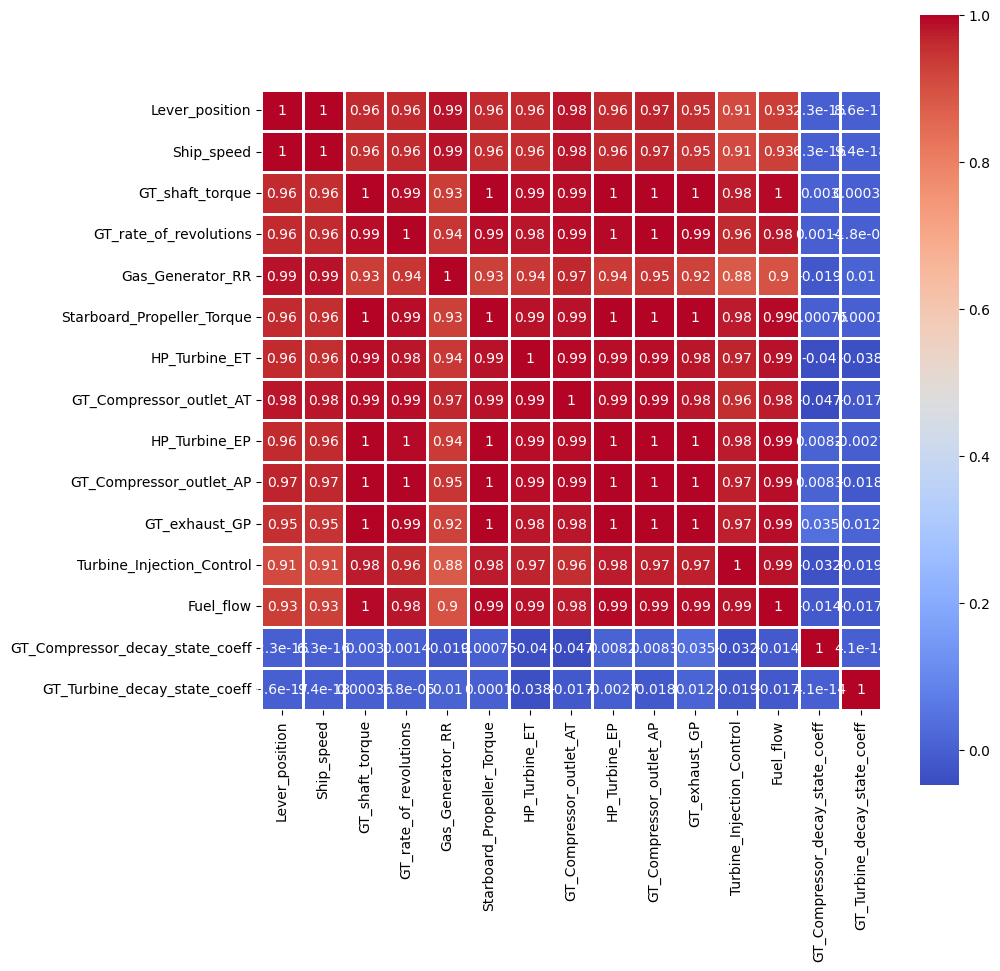

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data, cmap ="coolwarm" ,square= True, linewidth = 1 ,annot =  True)

**1.There exists a very strong positive correlation among all the input features.**

**2.As you can see most of the input features have a correlation value of 0.97 and above.**

**3.This means that when an input feature increases by one unit the correlated feature corresponding to that input feature also increases by one unit.**

**4.These input correlations will be useful in finetuning the base model in the future in the form of interaction terms.**

**5.Both the output labels have almost no correlation with any of the input features.**

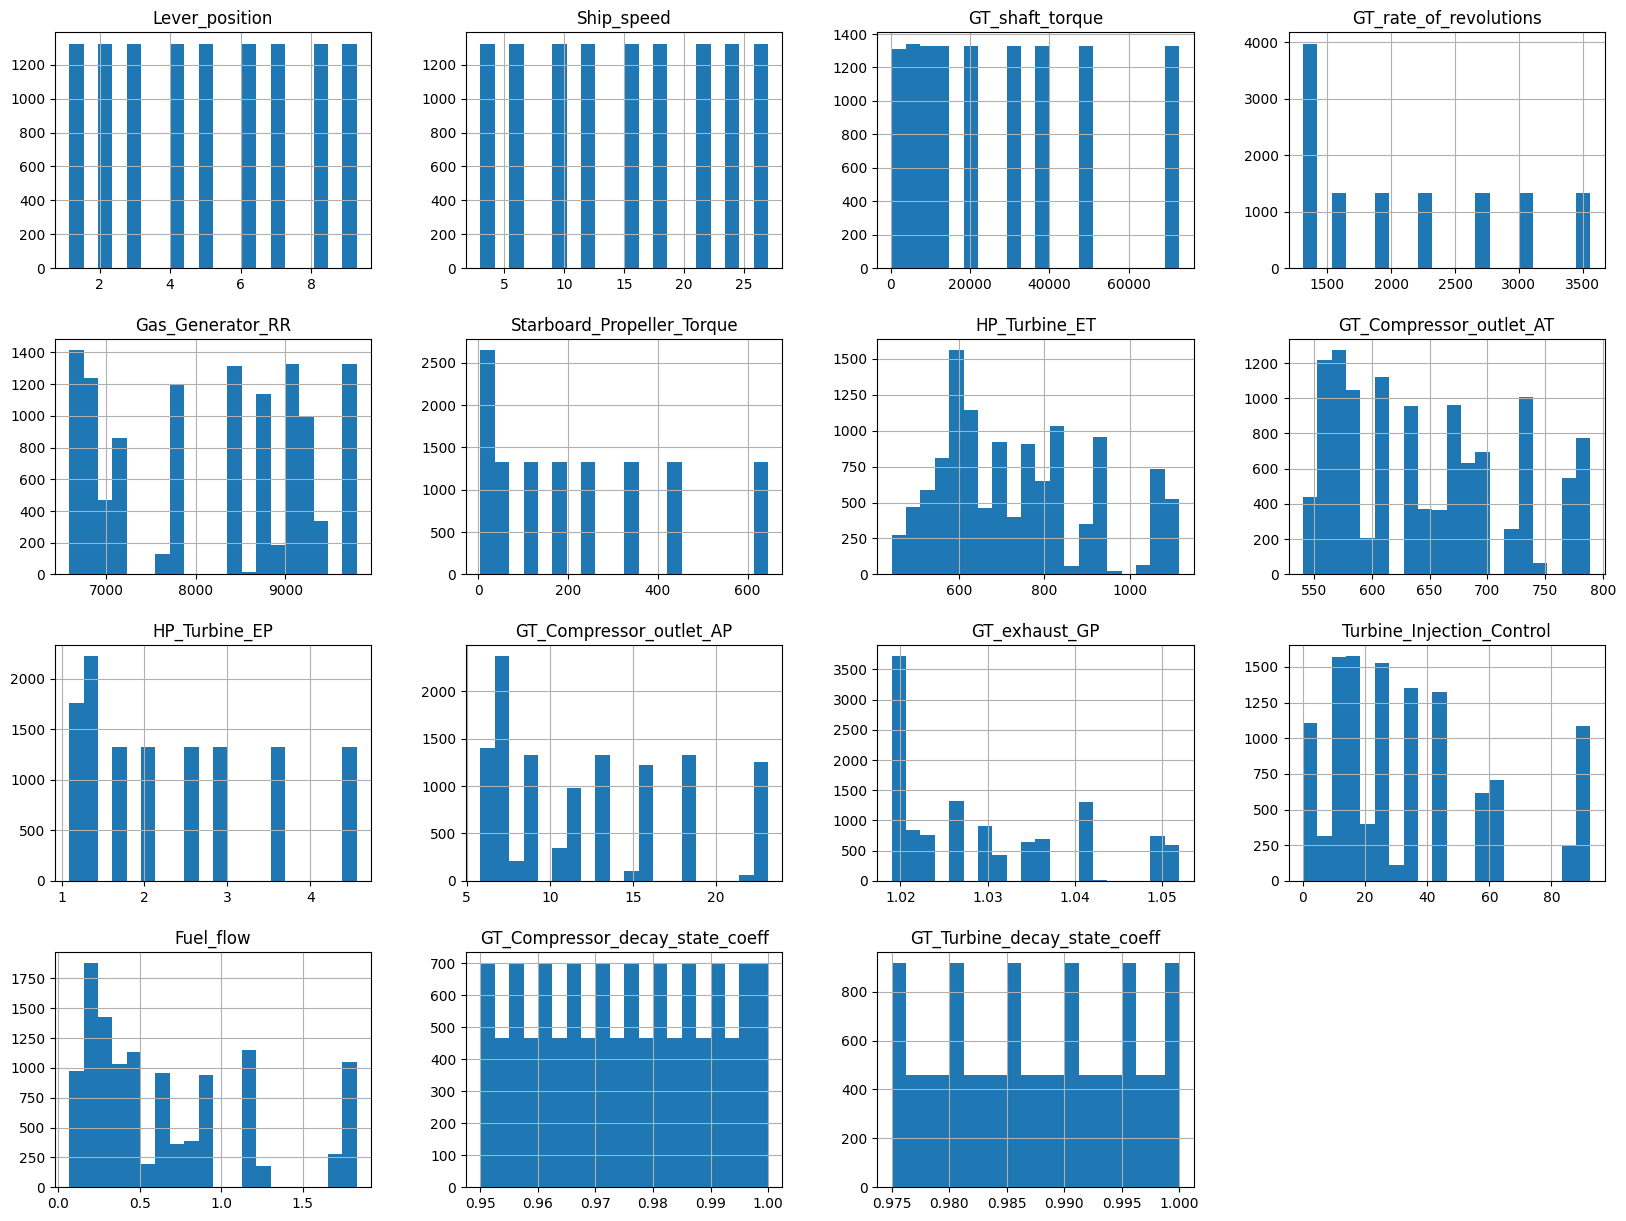

In [ ]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

**2d disributions plot is useful to study the relationship between 2 numeric variables if we have a huge number of points.**

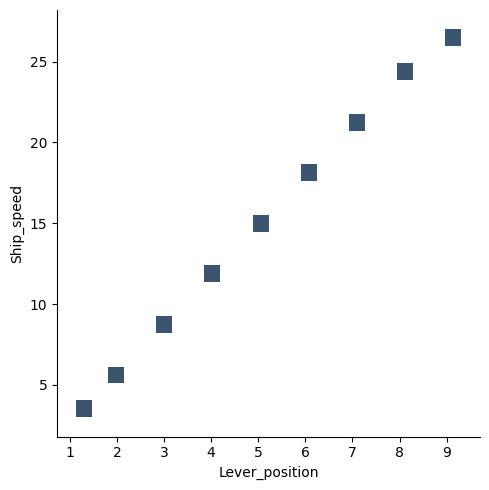

In [ ]:
sns.displot(df, x="Lever_position", y="Ship_speed")

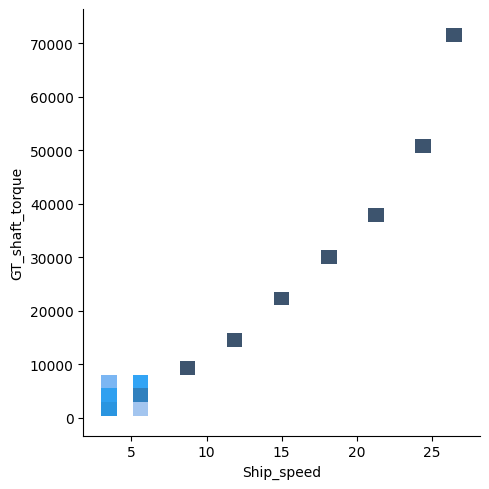

In [ ]:
sns.displot(df, x="Ship_speed", y="GT_shaft_torque")

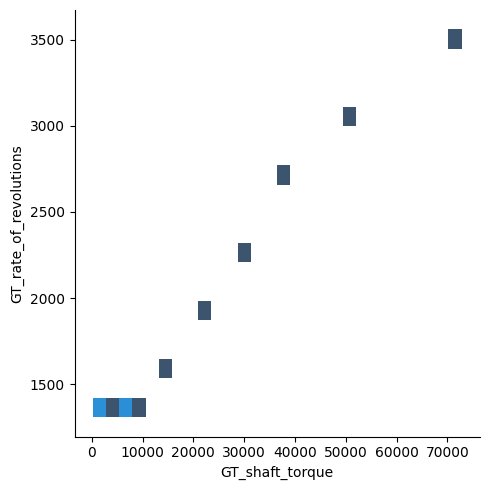

In [ ]:
sns.displot(df, x="GT_shaft_torque", y="GT_rate_of_revolutions")

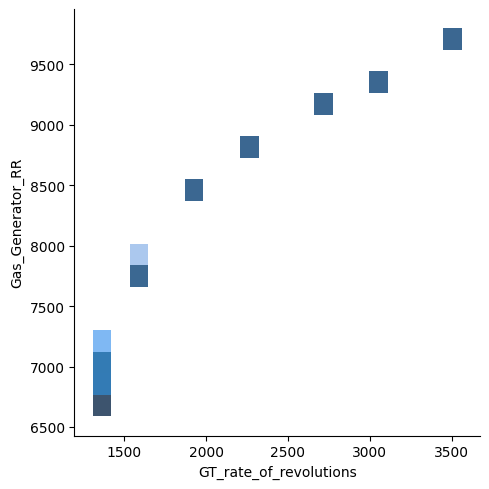

In [ ]:
  sns.displot(df, x="GT_rate_of_revolutions", y="Gas_Generator_RR")

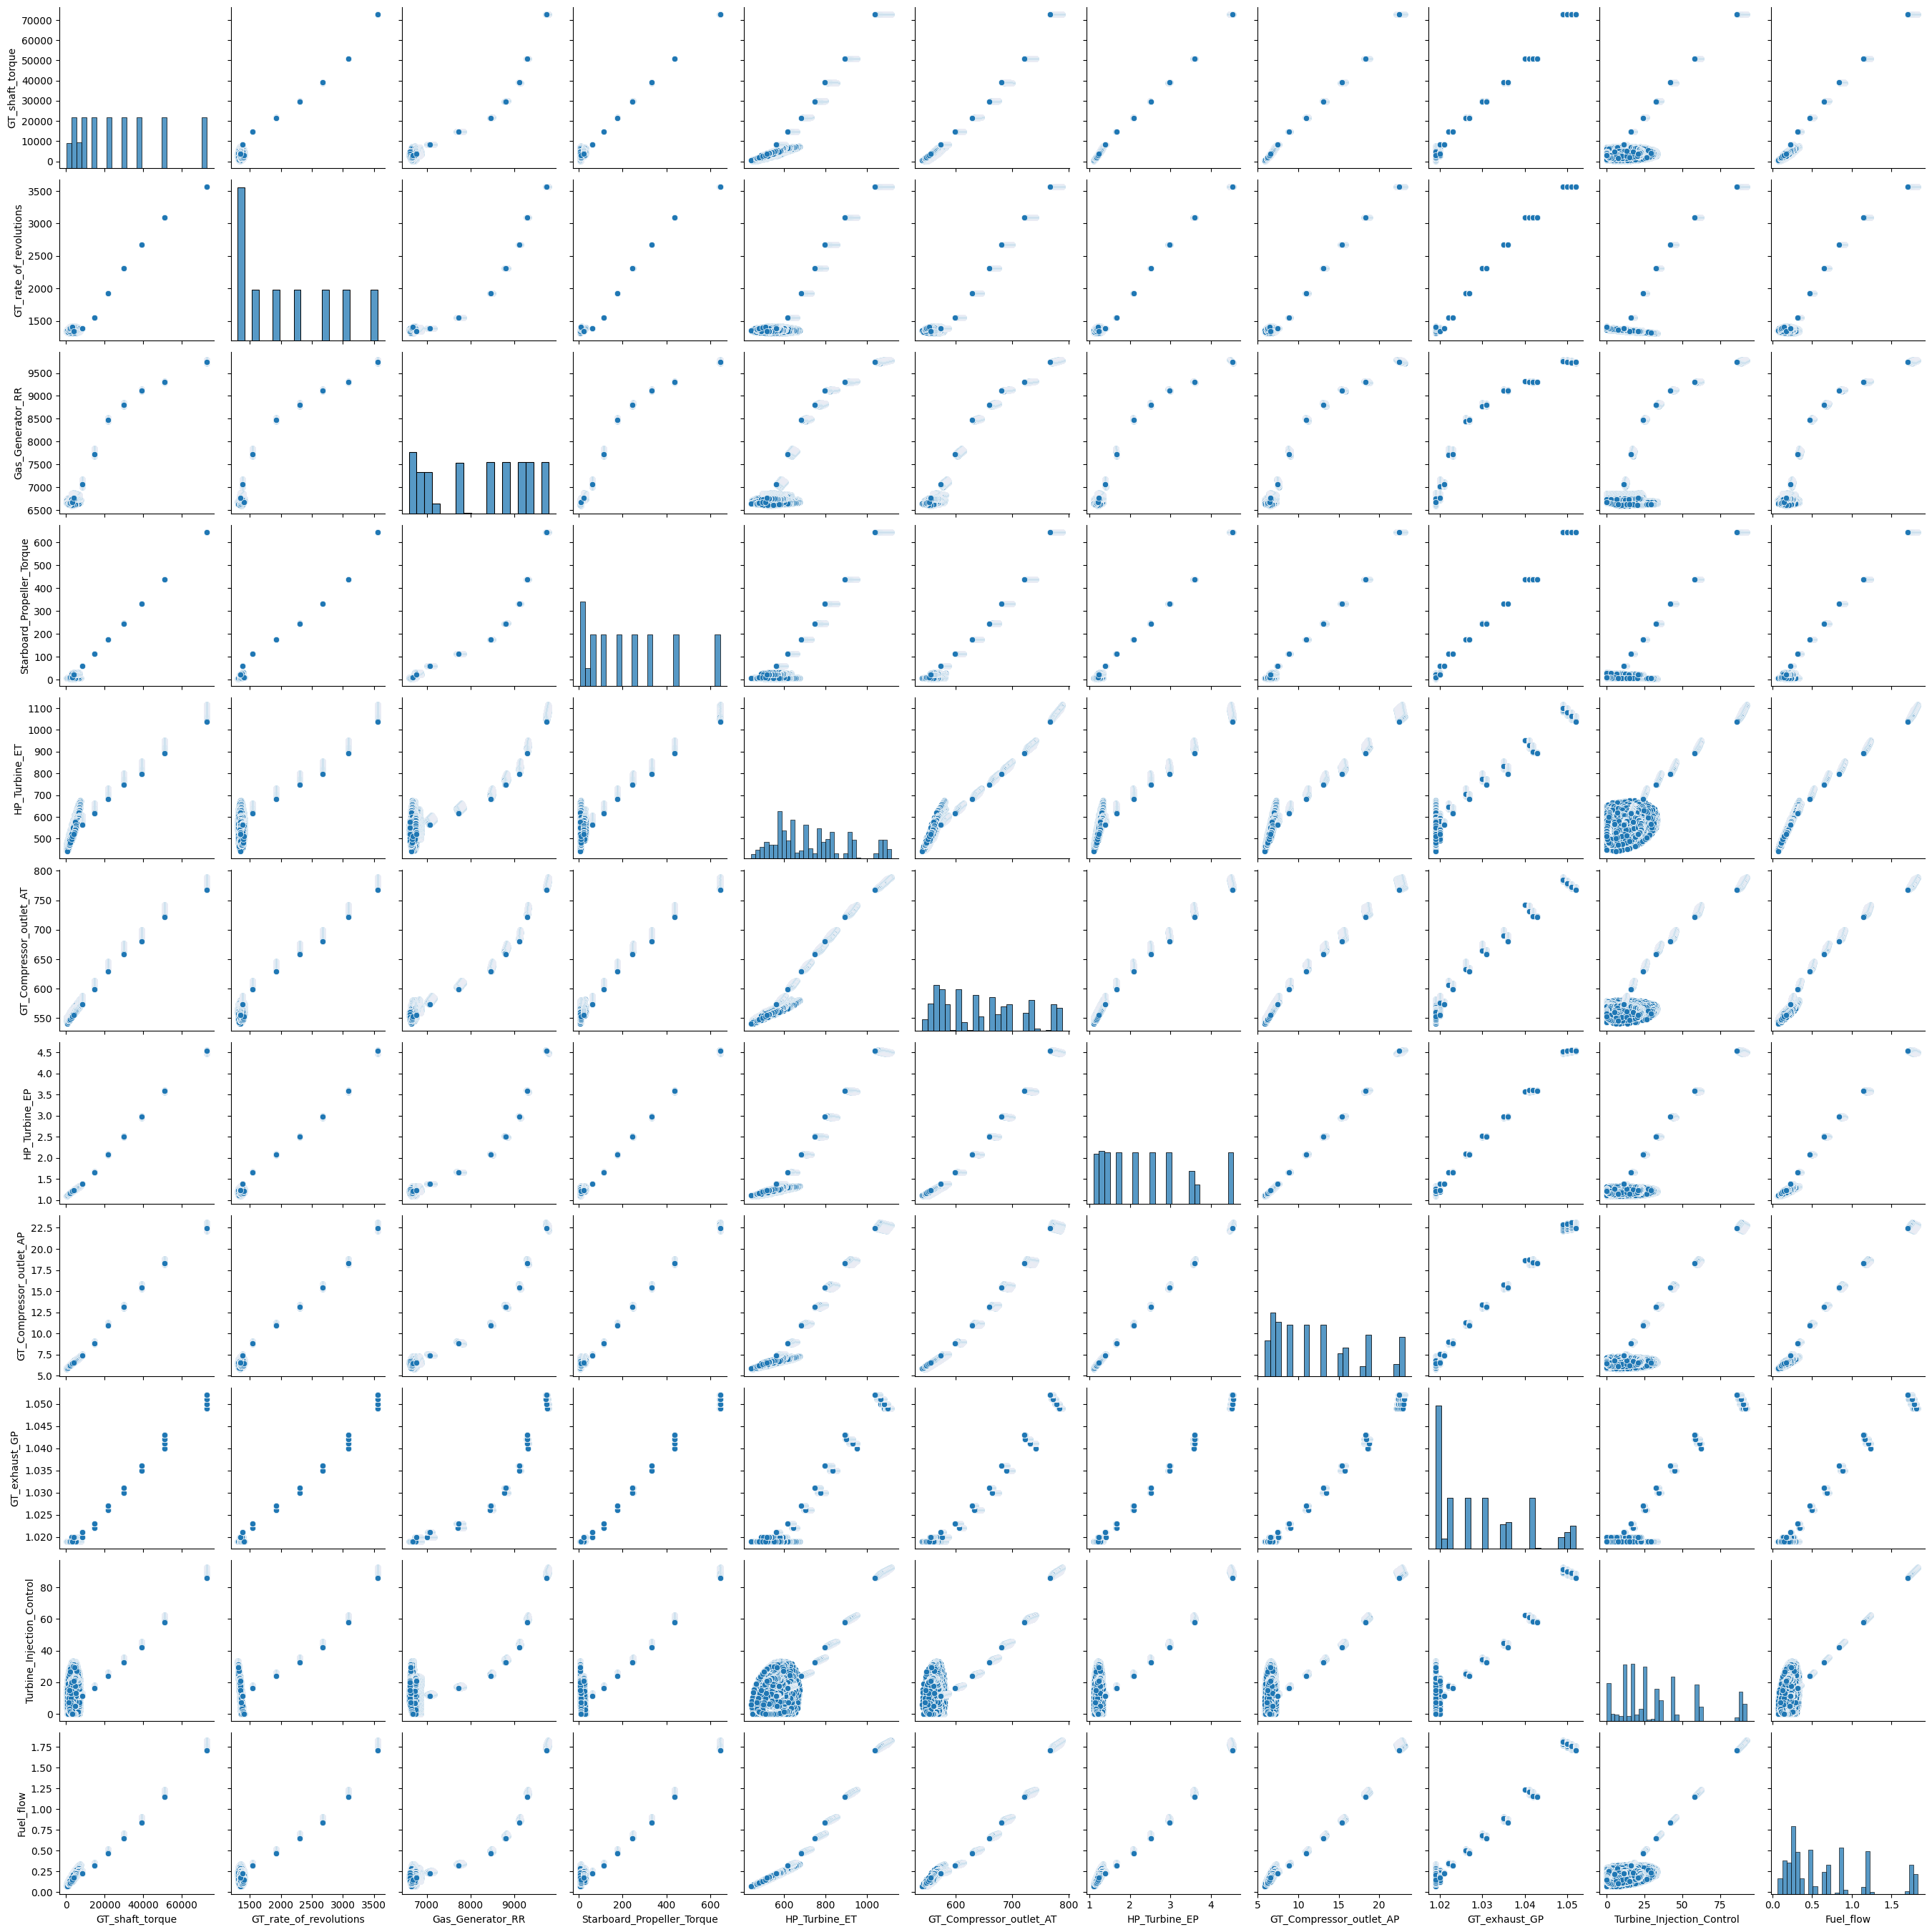

In [ ]:
sns.pairplot(df[df.columns[2:-2]])
plt.show()

**from above graph we can say that there seems to be linear pattern between the features**

Text(0.5, 1.0, 'Scatter Plot: HP_Turbine_EP vs. GT_Compressor_outlet_AP')

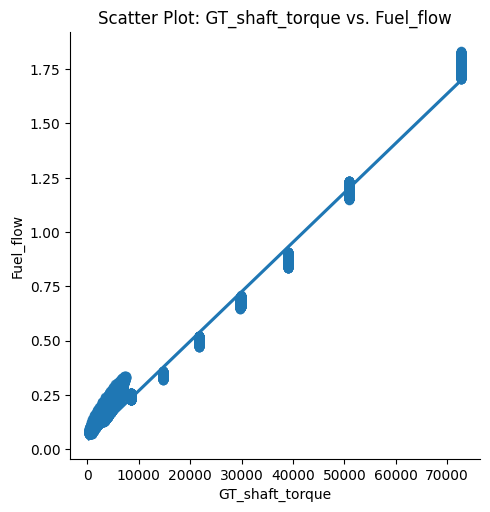

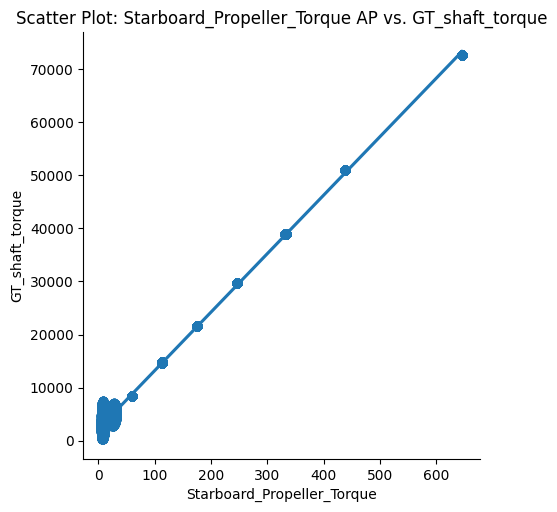

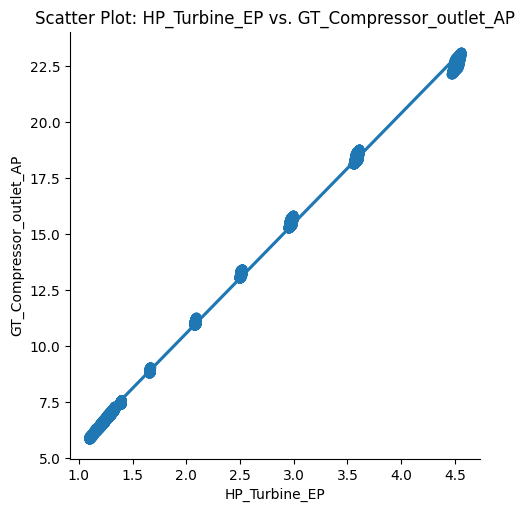

In [ ]:
# Scatter Plot: GT_shaft_torque AT vs. Fuel_flow
sns.lmplot(x='GT_shaft_torque', y='Fuel_flow', data=df)
plt.title('Scatter Plot: GT_shaft_torque vs. Fuel_flow')

# Scatter Plot: Starboard_Propeller_Torque vs. GT_shaft_torque
sns.lmplot(x='Starboard_Propeller_Torque', y='GT_shaft_torque', data=df)
plt.title('Scatter Plot: Starboard_Propeller_Torque AP vs. GT_shaft_torque')

# Scatter Plot:HP_Turbine_EP vs. GT_Compressor_outlet_AP
sns.lmplot(x='HP_Turbine_EP', y='GT_Compressor_outlet_AP', data=df)
plt.title('Scatter Plot: HP_Turbine_EP vs. GT_Compressor_outlet_AP')

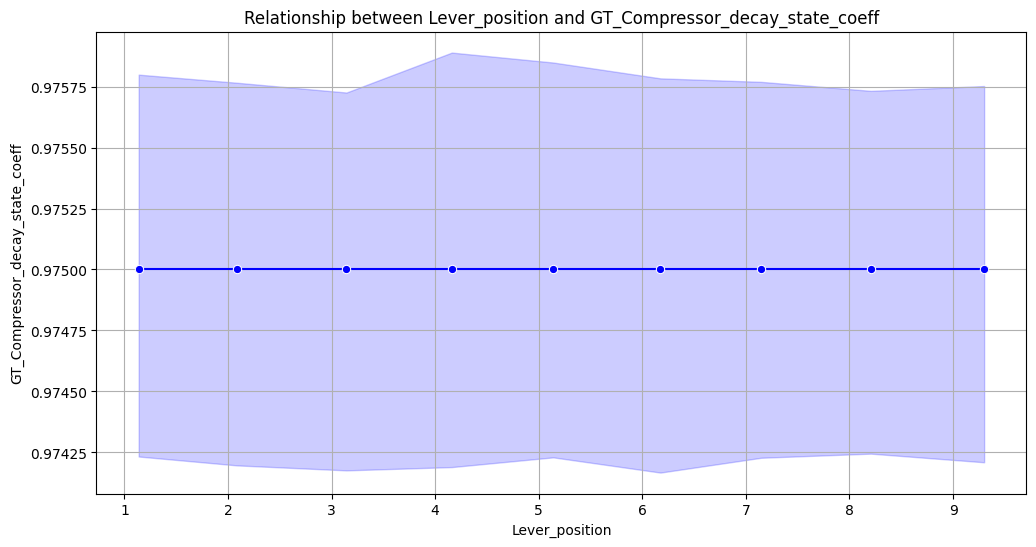

In [ ]:
# Select the dependent variable and an independent variable
dependent_variable = 'GT_Compressor_decay_state_coeff'
independent_variable = 'Lever_position'

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df[independent_variable], y=df[dependent_variable], marker='o', color='blue')
plt.title(f'Relationship between {independent_variable} and {dependent_variable}')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.grid()
plt.show()

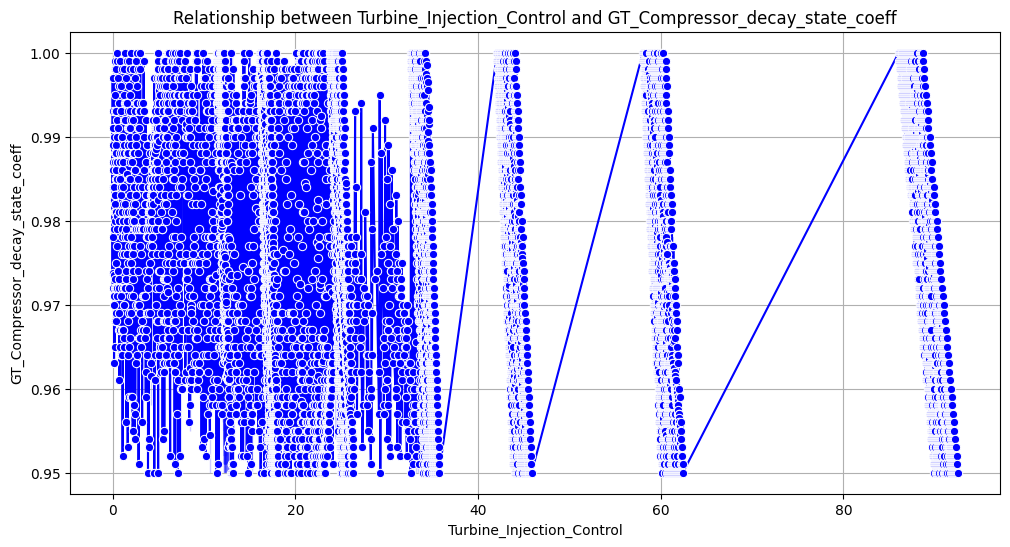

In [ ]:
# Select the dependent variable and an independent variable
dependent_variable = 'GT_Compressor_decay_state_coeff'
independent_variable = 'Turbine_Injection_Control'

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df[independent_variable], y=df[dependent_variable], marker='o', color='blue')
plt.title(f'Relationship between {independent_variable} and {dependent_variable}')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.grid()
plt.show()



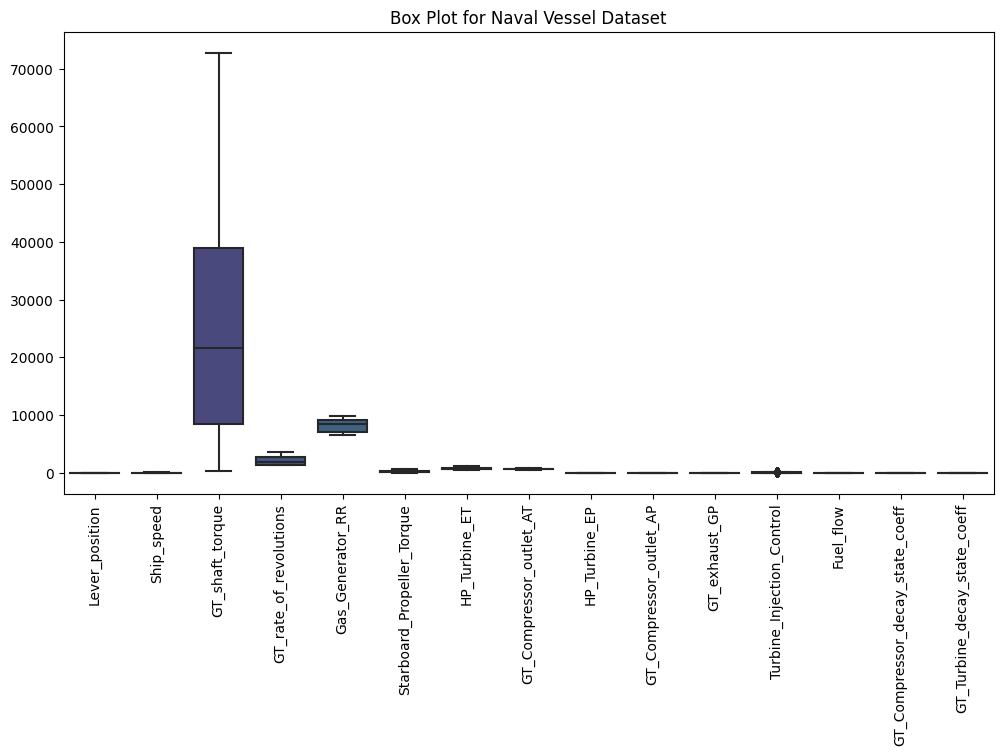

In [ ]:
# Create a box plot for the entire dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='viridis')
plt.title('Box Plot for Naval Vessel Dataset')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.shape

(11934, 15)

Model Fitting

In [ ]:
from sklearn.model_selection import train_test_split


Predicting GT Compressor decay state coefficient based on 14 features.

In [ ]:
X = df.drop(['GT_Compressor_decay_state_coeff','GT_Turbine_decay_state_coeff'] , axis = 1 )
y = df['GT_Compressor_decay_state_coeff']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((9547, 13), (2387, 13))

**MULTICOLLINEARITY**

In [ ]:
#Checking for Mutlicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
#Printing the VIF values
calc_vif(X)

,variables,VIF
0,Lever_position,193895.127527
1,Ship_speed,160996.834259
2,GT_shaft_torque,47064.785528
3,GT_rate_of_revolutions,13308.064120
4,Gas_Generator_RR,14308.040909
5,Starboard_Propeller_Torque,27552.226616
6,HP_Turbine_ET,65749.556476
7,GT_Compressor_outlet_AT,123794.712125
8,HP_Turbine_EP,156718.362337
9,GT_Compressor_outlet_AP,38243.340728


**Linear Regression**


In [ ]:
# Importing LinearRegression model from scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Creating an instance of a LinearRegression() model named lm
lm = LinearRegression()

In [ ]:
# Fitting the lm model with training set
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = lm.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.004601866299758122
RMSE: 0.005902441149823669
R2 score: 0.8406314528793501


**Decision Tree**

In [ ]:
# Importing DecisionTreeRegressor model from scikit learn library
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a DecisionTreeRegressor() model named clf
clf = DecisionTreeRegressor()

In [ ]:
# Fitting the clf model with training set
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = clf.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.0009786342689568524
RMSE: 0.0014728374332335459
R2 score: 0.9900768647844506


**Supprt Vector Machine**

In [ ]:
# Importing SVR model from scikit learn library
from sklearn.svm import SVR
from sklearn import metrics

In [ ]:
# Creating an instance of a SVR() model named svr
svr = SVR(kernel = 'rbf')

In [ ]:
# Fitting the svr model with training set
svr.fit(X_train, y_train)

SVR()

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = svr.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.012807289484708856
RMSE: 0.014789077027647906
R2 score: -0.0005099775837043019


**Random Forest**

In [ ]:
# Importing RandomForestRegressor model from scikit learn library
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a RandomForestRegressor() model named rfr
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fitting the clf model with training set
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = rfr.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.00046307917888561246
RMSE: 0.0008977183525299928
R2 score: 0.9963134554228225


**KNN**

In [ ]:
# Importing KNeighborsRegressor model from scikit learn library
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a KNeighborsRegressor() model named knn
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = knn.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.0013715123586091446
RMSE: 0.003654911015154422
R2 score: 0.938892727759269


**BOOSTING**

 **1.Adaptive Boosting(AdaBoost)**

In [ ]:
# Importing AdaBoostRegressor model from scikit learn library
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a AdaBoostRegressor() model named adaboost_model
adaboost_model = AdaBoostRegressor(n_estimators=1000,learning_rate=0.1)

In [ ]:
# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=1000)

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = adaboost_model.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.010808747732848116
RMSE: 0.013070141459623036
R2 score: 0.2185524063360491


**2.Gradient Boosting**

In [ ]:
# Importing GradientBoostingRegressor model from scikit learn library
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a GradientBoostingRegressor() model named gbr
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)

In [ ]:
# Fit the model to the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = gbr.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.0007078357187177502
RMSE: 0.0009543573790118434
R2 score: 0.9958335962475956


**3.Extreme Boosting(XG Boost)**

In [ ]:
# Importing GradientBoostingRegressor model from scikit learn library
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# Creating an instance of a XGBRegressor() model named xg
xg = XGBRegressor(n_estimators=1000, learning_rate=0.1)

In [ ]:
# Fit the model to the training data
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = xg.predict(X_test)

In [ ]:
# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 0.0007619705332039707
RMSE: 0.0010619934712696073
R2 score: 0.9948407927303091


**Bagging**

In [ ]:
# Importing GradientBoostingRegressor model from scikit learn library
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [ ]:
# Create a base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
# Creating an instance of a BaggingRegressor() model named bagging_model
bagging_model = BaggingRegressor(base_regressor, n_estimators=1000)

In [ ]:
# Fit the model to the training data
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=1000)

In [ ]:
# Predicting the y values by using the .predict() function
y_pred = bagging_model.predict(X_test)
y_pred

array([0.997817, 0.995375, 0.994068, ..., 0.96691 , 0.96224 , 0.980244])

In [ ]:
# Model performance
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE 0.0004469522413071953
RMSE: 0.0008701170478737833
R2 score: 0.9965366639177884


In [ ]:
from sklearn import metrics

models = [
    ("Linear Regression", lm),
    ("Decision Tree", clf),
    ("Supprt Vector Machine", svr),
    ("Random Forest", rfr),
    ("KNN", knn),
    ("Adaptive Boosting(AdaBoost)", adaboost_model),
    ("Gradient Boosting", gbr),
    ("Extreme Boosting(XG Boost)", xg),
    ("Bagging", bagging_model)
]

#Print results
print('Model Results:\n')
for model_name, model in models:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    model.fit(X_train, y_train)
    y_pred =  model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2_score = metrics.r2_score(y_test, y_pred)

    # Print the model name and regression evaluation metrics
    print(f"Model: {model_name}")
    print(f"MAE: {MAE}")
    print(f"RMSE: {RMSE}")
    print(f"R2 Score: {R2_score}")
    print('\n')

Model Results:

Model: Linear Regression
MAE: 0.004601866299758122
RMSE: 0.005902441149823669
R2 Score: 0.8406314528793501


Model: Decision Tree
MAE: 0.0009727691663175566
RMSE: 0.0014872731984475083
R2 Score: 0.9898813916689646


Model: Supprt Vector Machine
MAE: 0.012807289484708856
RMSE: 0.014789077027647906
R2 Score: -0.0005099775837043019


Model: Random Forest
MAE: 0.00046307917888561246
RMSE: 0.0008977183525299928
R2 Score: 0.9963134554228225


Model: KNN
MAE: 0.0013715123586091446
RMSE: 0.003654911015154422
R2 Score: 0.938892727759269


Model: Adaptive Boosting(AdaBoost)
MAE: 0.010609331152589663
RMSE: 0.012942694207330557
R2 Score: 0.23371793157598442


Model: Gradient Boosting
MAE: 0.0007087283609197686
RMSE: 0.000955380304345633
R2 Score: 0.9958246599641729


Model: Extreme Boosting(XG Boost)
MAE: 0.0007619705332039707
RMSE: 0.0010619934712696073
R2 Score: 0.9948407927303091


Model: Bagging
MAE: 0.0004510330959363363
RMSE: 0.0008864704346947656
R2 Score: 0.9964052574397751

**Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='linear'),
        layers.Dense(27, activation='linear'),
        layers.Dense(12, activation='linear'),
        layers.Dense(1)  # No activation for regression
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

model = build_model()

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size = 10, validation_split = 0.1)

Epoch 1/100
860/860 [==============================] - 4s 3ms/step - loss: 0.0190 - mae: 0.0394 - val_loss: 8.8682e-05 - val_mae: 0.0076
Epoch 2/100
860/860 [==============================] - 2s 3ms/step - loss: 1.7165e-04 - mae: 0.0099 - val_loss: 1.5796e-04 - val_mae: 0.0103
Epoch 3/100
860/860 [==============================] - 2s 3ms/step - loss: 4.0253e-04 - mae: 0.0133 - val_loss: 1.0554e-04 - val_mae: 0.0083
Epoch 4/100
860/860 [==============================] - 3s 4ms/step - loss: 7.8506e-04 - mae: 0.0155 - val_loss: 1.2235e-04 - val_mae: 0.0095
Epoch 5/100
860/860 [==============================] - 3s 4ms/step - loss: 1.0161e-04 - mae: 0.0080 - val_loss: 1.5624e-04 - val_mae: 0.0100
Epoch 6/100
860/860 [==============================] - 2s 3ms/step - loss: 1.5486e-04 - mae: 0.0095 - val_loss: 1.5631e-04 - val_mae: 0.0100
Epoch 7/100
860/860 [==============================] - 2s 3ms/step - loss: 1.4615e-04 - mae: 0.0090 - val_loss: 1.4747e-04 - val_mae: 0.0100
Epoch 8/100
860/8

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse_score}\nTest MAE: {test_mae_score}")

75/75 [==============================] - 0s 2ms/step - loss: 4.5171e-05 - mae: 0.0054
Test MSE: 4.517088018474169e-05
Test MAE: 0.005437018349766731


In [ ]:
#Make predictions
predictions = model.predict(X_test)
print(predictions.flatten())

75/75 [==============================] - 0s 2ms/step
[0.9867296  0.9912685  0.98607683 ... 0.971773   0.97049713 0.9789294 ]


In [ ]:
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 27)                891       
                                                                 
 dense_3 (Dense)             (None, 12)                336       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 4216 (16.47 KB)
Trainable params: 4216 (16.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


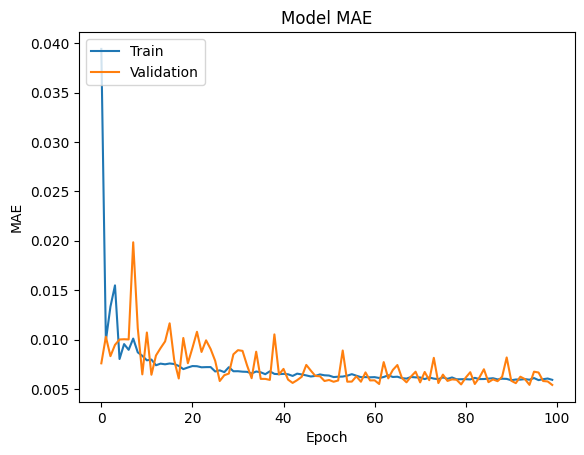

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()